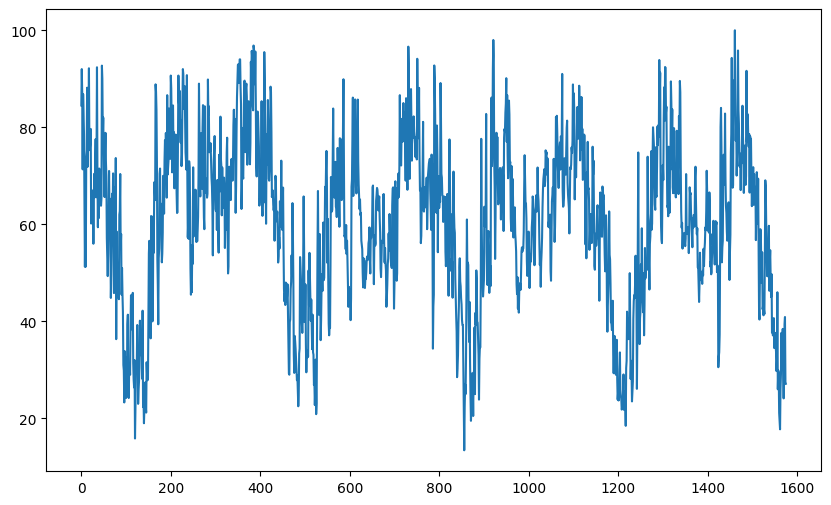

In [15]:
import pandas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset = pandas.read_csv('daily-climate.csv', usecols=[2], engine='python')
plt.plot(dataset)
plt.show()

In [16]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [17]:
numpy.random.seed(7)
datafram = pandas.read_csv('daily-climate.csv', usecols=[2], engine='python')
dataset = datafram.values
dataset = dataset.astype('float32')

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [19]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1055 521


In [20]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(1, look_back)))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

pickle.dump(model, open('time-series-prediction-model.pkl', 'wb'))

Epoch 1/50
33/33 - 2s - loss: 0.1485 - 2s/epoch - 61ms/step
Epoch 2/50
33/33 - 0s - loss: 0.0179 - 123ms/epoch - 4ms/step
Epoch 3/50
33/33 - 0s - loss: 0.0134 - 98ms/epoch - 3ms/step
Epoch 4/50
33/33 - 0s - loss: 0.0131 - 89ms/epoch - 3ms/step
Epoch 5/50
33/33 - 0s - loss: 0.0128 - 91ms/epoch - 3ms/step
Epoch 6/50
33/33 - 0s - loss: 0.0125 - 88ms/epoch - 3ms/step
Epoch 7/50
33/33 - 0s - loss: 0.0121 - 90ms/epoch - 3ms/step
Epoch 8/50
33/33 - 0s - loss: 0.0117 - 85ms/epoch - 3ms/step
Epoch 9/50
33/33 - 0s - loss: 0.0114 - 85ms/epoch - 3ms/step
Epoch 10/50
33/33 - 0s - loss: 0.0110 - 93ms/epoch - 3ms/step
Epoch 11/50
33/33 - 0s - loss: 0.0107 - 127ms/epoch - 4ms/step
Epoch 12/50
33/33 - 0s - loss: 0.0105 - 157ms/epoch - 5ms/step
Epoch 13/50
33/33 - 0s - loss: 0.0102 - 112ms/epoch - 3ms/step
Epoch 14/50
33/33 - 0s - loss: 0.0100 - 91ms/epoch - 3ms/step
Epoch 15/50
33/33 - 0s - loss: 0.0099 - 106ms/epoch - 3ms/step
Epoch 16/50
33/33 - 0s - loss: 0.0098 - 104ms/epoch - 3ms/step
Epoch 17/50


In [24]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Train Score: %.2f RMSE' % (testScore))

17/17 [==============================] - 0s 2ms/step
Train Score: 8.17 RMSE
Train Score: 7.32 RMSE


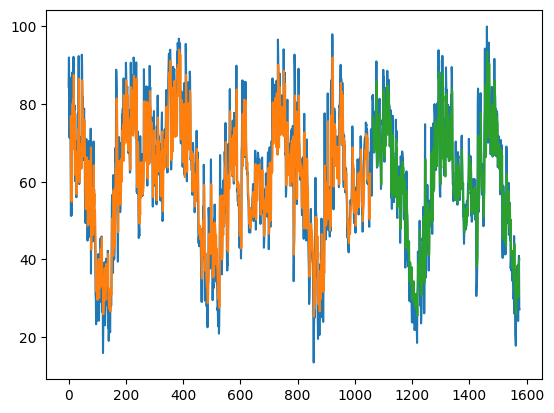

In [25]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :]  = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()